In [ ]:
""" MOHON DI KLIK PLAY PADA CELL INI (1) """
# Created By : Egi Fadli Soerachman
# Klasifikasi gambar bentuk tangan gunting batu kertas
# Menggunakan keras, tensorflow, sklearn
# Please visit my channel youtube
# https://www.youtube.com/channel/UC0RbonlRcnI9_gXv-K383VQ
# Please visit my Github
# https://github.com/egifadli

# Mengimport library Tensorflow

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from keras.applications.mobilenet import MobileNet
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator

print (tf.__version__) # mengecek versi tensorflow

In [ ]:
""" MOHON DI KLIK PLAY PADA CELL INI (2) """

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip



--2020-05-08 13:29:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  10.6MB/s    in 34s     

2020-05-08 13:30:16 (9.07 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
""" MOHON DI KLIK PLAY PADA CELL INI (3) """

# mengekstrak data dari resoursce lalu mendefinisikan direktori untuk data train dan data validasi
import zipfile,os
tempatzip = '/tmp/rockpaperscissors.zip'
file_ref = zipfile.ZipFile(tempatzip, 'r')
file_ref.extractall('/tmp')
file_ref.close()

# Data untuk Image Dataset Generator
tempatdata = '/tmp/rockpaperscissors/rps-cv-images/'
tempattrain = '/tmp/rockpaperscissors/'

FileNotFoundError: ignored

In [ ]:
# mengecek melihat isi direktori
os.listdir('/tmp/rockpaperscissors')

['rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images', 'paper']

In [ ]:
# membuat sub-direktori latih dan validasi

# membuat direktori gunting batu kertas untuk direktori data training & validasi

latih_paper_dir = os.path.join(tempattrain, 'paper')
latih_rock_dir = os.path.join(tempattrain, 'rock')
latih_scissors_dir = os.path.join(tempattrain, 'scissors')

valid_paper_dir = os.path.join(tempatdata, 'paper')
valid_rock_dir = os.path.join(tempatdata, 'rock')
valid_scissors_dir = os.path.join(tempatdata, 'scissors')

In [ ]:
""" MOHON DI KLIK PLAY PADA CELL INI (4) """

# membuat objek Image Data Generator untuk data training dan data testing
# berikut proses augmentasi gambar pada sampel dataset

# mensiapkan dataset augmentasi

latih_data = ImageDataGenerator( #dataset augmentasi train
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    validation_split = 0.2,
    fill_mode = 'wrap'
)  

valid_data = ImageDataGenerator( # dataset augmentasi validasi
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    validation_split = 0.2
)  

# membagi dataset train dan validasi

# dataset untuk train
latih_gen = latih_data.flow_from_directory(
    tempatdata,
    #target_size = (224, 224),
    target_size = (100, 150),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True,
    subset = 'training'
)

# dataset untuk validasi
valid_gen = valid_data.flow_from_directory(
    tempatdata,
    #target_size=(224, 224),
    target_size = (100, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
""" MOHON DI KLIK PLAY PADA CELL INI (5) """

# membangun arsitektur CNN & membuat model Sequential
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(100, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
       tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
       tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'), # hidden layer 1
        tf.keras.layers.Dense(3, activation='softmax') # hidden layer 2, fungsi softmax untuk multi classes
])

# memanggil fungsi compile pada objek model, tentukan loss function dan optimizer
model.compile(
    loss = 'categorical_crossentropy', # Pakai Categorical Crossentropy
    optimizer = tf.optimizers.SGD(), # Pakai SGD
    metrics = ['accuracy']
              )

# melatih model dengan menggunakan metode fit
model.fit(
    latih_gen,
    steps_per_epoch = 20, # jumlah bacth yg akan di eksekusi pada setiap epoch
    epochs = 25, # jumlah tahapan train
    validation_data = valid_gen, # menampilkan akurasi dari pengujian validasi
    validation_steps = 5, # jumlah bacth yg akan di eksekusi pada setiap epoch
    verbose = 2
)


#Hasil Test Terbaik
#Waktu : 10 menit
#Loss : 31%
#Akurasi : 90%
#Val_Loss : 21%
#Val_Akurasi : 92%

Epoch 1/25
20/20 - 21s - loss: 1.0963 - accuracy: 0.3781 - val_loss: 1.1135 - val_accuracy: 0.0063
Epoch 2/25
20/20 - 21s - loss: 1.0939 - accuracy: 0.3641 - val_loss: 1.0804 - val_accuracy: 0.4563
Epoch 3/25
20/20 - 21s - loss: 1.0907 - accuracy: 0.4105 - val_loss: 1.0714 - val_accuracy: 0.6644
Epoch 4/25
20/20 - 21s - loss: 1.0879 - accuracy: 0.4516 - val_loss: 1.0829 - val_accuracy: 0.7500
Epoch 5/25
20/20 - 21s - loss: 1.0846 - accuracy: 0.5031 - val_loss: 1.0677 - val_accuracy: 0.7651
Epoch 6/25
20/20 - 21s - loss: 1.0800 - accuracy: 0.4960 - val_loss: 1.0854 - val_accuracy: 0.5188
Epoch 7/25
20/20 - 21s - loss: 1.0724 - accuracy: 0.5172 - val_loss: 1.0579 - val_accuracy: 0.3250
Epoch 8/25
20/20 - 21s - loss: 1.0719 - accuracy: 0.5203 - val_loss: 1.0729 - val_accuracy: 0.7000
Epoch 9/25
20/20 - 21s - loss: 1.0573 - accuracy: 0.5531 - val_loss: 0.9924 - val_accuracy: 0.7563
Epoch 10/25
20/20 - 21s - loss: 1.0396 - accuracy: 0.5750 - val_loss: 0.9705 - val_accuracy: 0.7785
Epoch 11/

Silahkan upload gambar tangan gunting, batu atau kertas


Saving scissors.png to scissors (5).png
scissors.png
 Tangan berbentuk gunting


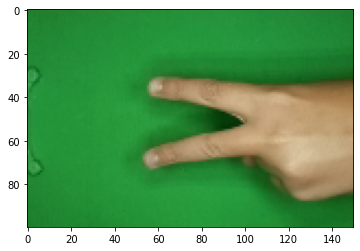

In [ ]:
""" MOHON DI KLIK PLAY PADA CELL INI (6) """

# interaktif memilih gambar, lalu resize gambar, dan mengubah menjadi larik numpy
# prediksi model kita :

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print('Silahkan upload gambar tangan gunting, batu atau kertas')
uploaded = files.upload()

for prediksi in uploaded.keys():
  # memprediksi gambar
  path = prediksi
  img = image.load_img(path, target_size = (100, 150)) # format ukuran gambar
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(prediksi)
  if classes [0][0] == 1:
    print('\033[1m ' + '\033[94m' + 'Tangan berbentuk kertas' + '\033[0m')
  elif classes [0][1] == 1:
    print('\033[1m ' + '\033[94m' + 'Tangan berbentuk batu' + '\033[0m')
  elif classes [0][2] == 1:
    print('\033[1m ' + '\033[94m' + 'Tangan berbentuk gunting' + '\033[0m')
  else:
    print('\033[1m ' + '\033[94m' + 'Gambar tidak diketahui' + '\033[0m')